In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
data = pd.read_csv('heart_disease.csv')
data.fillna(data.mean(), inplace=True)

In [35]:
features = data.drop(columns=['HeartDisease'])
features = (features - features.mean()) / features.std()
labels = data['HeartDisease'].values

In [36]:
def train_test_val_split(features, labels, train_size=0.7, val_size=0.15):
    total_size = len(features)
    train_end = int(train_size * total_size)
    val_end = int((train_size + val_size) * total_size)
    
    X_train = features[:train_end]
    y_train = labels[:train_end]
    X_val = features[train_end:val_end]
    y_val = labels[train_end:val_end]
    X_test = features[val_end:]
    y_test = labels[val_end:]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = train_test_val_split(features.values, labels)

In [37]:
def initialize_weights(n_features):
    weights = np.zeros(n_features)
    bias = 0
    return weights, bias


In [38]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [39]:
def compute_loss(y_true, y_pred):
    m = len(y_true)
    loss = -1/m * (np.dot(y_true, np.log(y_pred)) + np.dot((1 - y_true), np.log(1 - y_pred)))
    return loss

In [40]:
def gradient_descent(X, y, weights, bias, learning_rate, iterations):
    m = len(y)
    loss_history = []
    accuracy_history = []
    val_loss_history = []
    val_accuracy_history = []
    
    for i in range(iterations):
        # Forward propagation
        z = np.dot(X, weights) + bias
        y_pred = sigmoid(z)
        
        # Compute loss
        loss = compute_loss(y, y_pred)
        loss_history.append(loss)
        
        # Compute gradients
        dw = 1/m * np.dot(X.T, (y_pred - y))
        db = 1/m * np.sum(y_pred - y)
        
        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db
        
        # Compute accuracy
        y_pred_class = [1 if i > 0.5 else 0 for i in y_pred]
        accuracy = np.mean(y_pred_class == y)
        accuracy_history.append(accuracy)
        
        # Validation loss and accuracy
        if i % 10 == 0:
            z_val = np.dot(X_val, weights) + bias
            y_val_pred = sigmoid(z_val)
            val_loss = compute_loss(y_val, y_val_pred)
            val_loss_history.append(val_loss)
            y_val_pred_class = [1 if i > 0.5 else 0 for i in y_val_pred]
            val_accuracy = np.mean(y_val_pred_class == y_val)
            val_accuracy_history.append(val_accuracy)
    
    return weights, bias, loss_history, accuracy_history, val_loss_history, val_accuracy_history

In [41]:
learning_rate = 0.01
iterations = 1000
weights, bias = initialize_weights(X_train.shape[1])
weights, bias, loss_history, accuracy_history, val_loss_history, val_accuracy_history = gradient_descent(
    X_train, y_train, weights, bias, learning_rate, iterations)

In [42]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

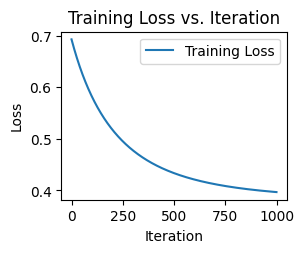

In [43]:
plt.subplot(2, 2, 1)
plt.plot(loss_history, label='Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss vs. Iteration')
plt.legend()

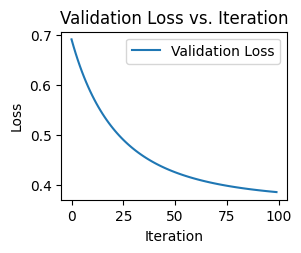

In [44]:
plt.subplot(2, 2, 2)
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Validation Loss vs. Iteration')
plt.legend()

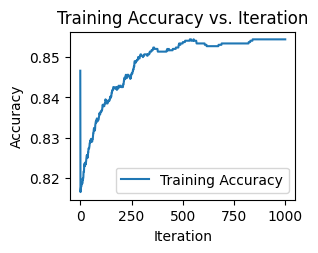

In [45]:
plt.subplot(2, 2, 3)
plt.plot(accuracy_history, label='Training Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs. Iteration')
plt.legend()

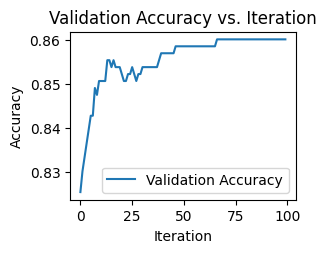

In [46]:
plt.subplot(2, 2, 4)
plt.plot(val_accuracy_history, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy vs. Iteration')
plt.legend()

In [47]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [48]:
print("Final Training Loss:", loss_history[-1])
print("Final Validation Loss:", val_loss_history[-1])
print("Final Training Accuracy:", accuracy_history[-1])
print("Final Validation Accuracy:", val_accuracy_history[-1])

Final Training Loss: 0.3967292336386199
Final Validation Loss: 0.38550812172230825
Final Training Accuracy: 0.8543492919757248
Final Validation Accuracy: 0.860062893081761


### Investigating and comparing the performance of the model with different feature scaling method

In [49]:
def gradient_descent(X, y, X_val, y_val, weights, bias, learning_rate, iterations):
    m = len(y)
    loss_history = []
    val_loss_history = []
    
    for i in range(iterations):
        # Forward propagation
        z = np.dot(X, weights) + bias
        y_pred = sigmoid(z)
        
        # Compute loss
        loss = compute_loss(y, y_pred)
        loss_history.append(loss)
        
        # Compute gradients
        dw = 1/m * np.dot(X.T, (y_pred - y))
        db = 1/m * np.sum(y_pred - y)
        
        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db
        
        # Validation loss
        z_val = np.dot(X_val, weights) + bias
        y_val_pred = sigmoid(z_val)
        val_loss = compute_loss(y_val, y_val_pred)
        val_loss_history.append(val_loss)
    
    return weights, bias, loss_history, val_loss_history

In [50]:
def min_max_scaling(features):
    return (features - features.min()) / (features.max() - features.min())

def no_scaling(features):
    return features

In [51]:
features = data.drop(columns=['HeartDisease'])
labels = data['HeartDisease'].values
features_min_max = min_max_scaling(features)
X_train_mm, y_train_mm, X_val_mm, y_val_mm, X_test_mm, y_test_mm = train_test_val_split(features_min_max.values, labels)
features_no_scaling = no_scaling(features)
X_train_ns, y_train_ns, X_val_ns, y_val_ns, X_test_ns, y_test_ns = train_test_val_split(features_no_scaling.values, labels)

In [52]:
learning_rate = 0.01
iterations = 1000

In [53]:
weights_mm, bias_mm = initialize_weights(X_train_mm.shape[1])
weights_mm, bias_mm, loss_history_mm, val_loss_history_mm = gradient_descent(X_train_mm, y_train_mm, X_val_mm, y_val_mm, weights_mm, bias_mm, learning_rate, iterations)

In [54]:
weights_ns, bias_ns = initialize_weights(X_train_ns.shape[1])
weights_ns, bias_ns, loss_history_ns, val_loss_history_ns = gradient_descent(X_train_ns, y_train_ns, X_val_ns, y_val_ns, weights_ns, bias_ns, learning_rate, iterations)

C:\Users\ANTPC\AppData\Local\Temp\ipykernel_14972\3196251242.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\ANTPC\AppData\Local\Temp\ipykernel_14972\1816054624.py:3: RuntimeWarning: divide by zero encountered in log
  loss = -1/m * (np.dot(y_true, np.log(y_pred)) + np.dot((1 - y_true), np.log(1 - y_pred)))


In [55]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

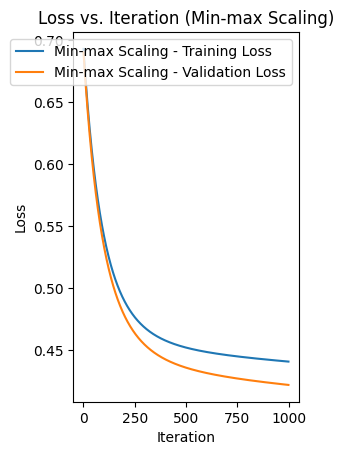

In [56]:
plt.subplot(1, 2, 1)
plt.plot(loss_history_mm, label='Min-max Scaling - Training Loss')
plt.plot(val_loss_history_mm, label='Min-max Scaling - Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs. Iteration (Min-max Scaling)')
plt.legend()

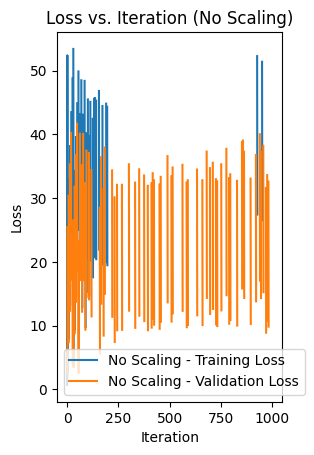

In [57]:
plt.subplot(1, 2, 2)
plt.plot(loss_history_ns, label='No Scaling - Training Loss')
plt.plot(val_loss_history_ns, label='No Scaling - Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs. Iteration (No Scaling)')
plt.legend()

In [58]:

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [59]:
print("Final Training Loss (Min-max Scaling):", loss_history_mm[-1])
print("Final Validation Loss (Min-max Scaling):", val_loss_history_mm[-1])
print("Final Training Loss (No Scaling):", loss_history_ns[-1])
print("Final Validation Loss (No Scaling):", val_loss_history_ns[-1])

Final Training Loss (Min-max Scaling): 0.44046285698250304
Final Validation Loss (Min-max Scaling): 0.42160730632885596
Final Training Loss (No Scaling): 45.298495848765356
Final Validation Loss (No Scaling): 20.178672457949315


### Calculate and present the confusion matrix for the validation set

In [60]:
class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cross_entropy_loss(self, y, y_hat):
        return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        self.losses = []

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_hat = self.sigmoid(linear_model)

            loss = self.cross_entropy_loss(y, y_hat)
            self.losses.append(loss)

            dw = np.dot(X.T, (y_hat - y)) / len(y)
            db = np.sum(y_hat - y) / len(y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        return self.predict_proba(X) >= threshold

In [61]:
X_train, X_temp, y_train, y_temp = train_test_val_split(features, labels, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_val_split(X_temp, y_temp, test_size=0.5, random_state=42)
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()
X_val_np = X_val.to_numpy()
y_val_np = y_val.to_numpy()

TypeError: train_test_val_split() got an unexpected keyword argument 'test_size'

In [ ]:
model = LogisticRegressionGD(learning_rate=1, epochs=1000)
model.fit(X_train_np, y_train_np)

In [ ]:
y_val_pred = model.predict(X_val_np)

In [ ]:
conf_matrix = confusion_matrix(y_val_np, y_val_pred)
precision = precision_score(y_val_np, y_val_pred)
recall = recall_score(y_val_np, y_val_pred)
f1 = f1_score(y_val_np, y_val_pred)
roc_auc = roc_auc_score(y_val_np, model.predict_proba(X_val_np))

In [ ]:
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)